<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Working, Add more than 7 models
#Batch size = 32 vs 64 vs 128 for model 3 W/O Aug
#Model 5 winner

##Preprocessing

In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils
from keras.models import Sequential
from scipy.misc import toimage
from keras.layers import Dense, Activation, Flatten,Conv2D,MaxPooling2D,Dropout, BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

Using TensorFlow backend.


The goal is to recognize previously unseen images and assign them to one of the 10 classes.
Let us define a suitable deep net.

In [0]:
from keras.datasets import cifar10 
(X_train_original, y_train_original), (X_test_original, y_test_original) = cifar10.load_data()


In [0]:
#OneHotEncoding
y_train_hot = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)


In [0]:
#Normalize
X_train_nor = X_train_original.astype('float32')
X_test_nor = X_test_original.astype('float32')
X_train_nor = (X_train_nor) / 255
X_test = (X_test_nor) / 255


In [0]:
#Manual Validation Divide
split = int(X_train_original.shape[0] * (4/5))

X_train = X_train_nor[:split]
y_train = y_train_hot[:split]

X_train_val = X_train_nor[split:]
y_train_val = y_train_hot[split:]


#Models

##Model 1: 69%

In [7]:
#Overfitting
#0.68 test 0.6904
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),input_shape=(30,30,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)  

In [8]:
model.fit(X_train, y_train, epochs = 20,batch_size= 32,verbose = 1,validation_data=[X_train_val,y_train_val])

score = model.evaluate(X_test,y_test,batch_size = 128,verbose = 1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 14s 340us/step - loss: 1.5139 - acc: 0.4600 - val_loss: 1.2357 - val_acc: 0.5685
Epoch 2/20
40000/40000 [==============================] - 11s 280us/step - loss: 1.1746 - acc: 0.5856 - val_loss: 1.3323 - val_acc: 0.5476
Epoch 3/20
40000/40000 [==============================] - 11s 284us/step - loss: 1.0496 - acc: 0.6312 - val_loss: 1.0380 - val_acc: 0.6440
Epoch 4/20
40000/40000 [==============================] - 11s 285us/step - loss: 0.9475 - acc: 0.6685 - val_loss: 1.0368 - val_acc: 0.6486
Epoch 5/20
40000/40000 [==============================] - 12s 300us/step - loss: 0.8861 - acc: 0.6917 - val_loss: 0.9707 - val_acc: 0.6722
Epoch 6/20
40000/40000 [==============================] - 13s 326us/step - loss: 0.8320 - acc: 0.7114 - val_loss: 0.9991 - val_acc: 0.6655
Epoch 7/20
40000/40000 [==============================] - 16s 391us/

##Model 2: 50%

In [9]:
#47%
model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=(32,32,3)))
model2.add(Conv2D(32,(3,3),input_shape=(30,30,3)))
model2.add(Conv2D(32,(3,3),input_shape=(28,28,3)))
model2.add(Flatten())
model2.add(Dense(512,activation = 'relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model2.summary()
model2.fit(X_train,y_train,epochs=20 , batch_size = 128,verbose = 1,validation_data=[X_train_val,y_train_val])

score = model2.evaluate(X_test,y_test,batch_size = 128,verbose = 1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               11076096  
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 11,100,618
Trainable params: 11,100,618
Non-trainable params: 0
________________________________________________________________

##Model 3 78%:

One way to improve the performance is to define a deeper network

In [0]:
#0.78 , test 0.76
model3 = Sequential()
model3.add(Conv2D(32,(3,3), input_shape=(32,32,3)))
model3.add(Activation('relu'))
model3.add(Conv2D(32,(3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64,(3,3)))
model3.add(Activation('relu'))
model3.add(Conv2D(64,(3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.25))

model3.add(Dense(10))
model3.add(Activation('softmax'))

#model3.summary()
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [11]:
model3.fit(X_train,y_train,epochs = 20,batch_size = 128, verbose = 1,validation_data=[X_train_val,y_train_val])
score = model3.evaluate(X_test,y_test,batch_size = 128,verbose = 1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 10s 252us/step - loss: 1.6632 - acc: 0.3839 - val_loss: 1.3360 - val_acc: 0.5200
Epoch 2/20
40000/40000 [==============================] - 9s 224us/step - loss: 1.2567 - acc: 0.5507 - val_loss: 1.1897 - val_acc: 0.5828
Epoch 3/20
40000/40000 [==============================] - 9s 226us/step - loss: 1.1034 - acc: 0.6076 - val_loss: 0.9888 - val_acc: 0.6515
Epoch 4/20
40000/40000 [==============================] - 9s 223us/step - loss: 0.9945 - acc: 0.6496 - val_loss: 0.9478 - val_acc: 0.6711
Epoch 5/20
40000/40000 [==============================] - 9s 230us/step - loss: 0.9144 - acc: 0.6773 - val_loss: 0.8482 - val_acc: 0.7071
Epoch 6/20
40000/40000 [==============================] - 9s 229us/step - loss: 0.8373 - acc: 0.7052 - val_loss: 0.8158 - val_acc: 0.7111
Epoch 7/20
40000/40000 [==============================] - 9s 226us/step - loss: 0.7806 - acc: 0.7276 - val_loss: 0.8095 -

##Model 4:  Only One CNN Layer 67%

Our net will learn 32 convolutional filters, each of which with a 3 x 3 size. The output
dimension is the same one of the input shape, so it will be 32 x 32 and activation is ReLU

 After that we have a max-pooling
operation with pool size 2 x 2 and a dropout at 25%

In [12]:
#68% 0.6755 test
model4 = Sequential()
model4.add(Conv2D(32,(3,3),padding = 'same',input_shape =(32,32,3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size= (2,2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.summary()

OPTIM = RMSprop()
model4.compile(loss = 'categorical_crossentropy', optimizer=OPTIM,metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
__________

In [13]:
model4.fit(X_train,y_train,batch_size = 128, epochs =20 , verbose = 1,validation_data = [X_train_val,y_train_val])

score = model4.evaluate(X_test,y_test,batch_size = 128,verbose = 1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 6s 157us/step - loss: 1.7015 - acc: 0.3967 - val_loss: 1.4591 - val_acc: 0.4825
Epoch 2/20
40000/40000 [==============================] - 6s 144us/step - loss: 1.3493 - acc: 0.5202 - val_loss: 1.2159 - val_acc: 0.5728
Epoch 3/20
40000/40000 [==============================] - 6s 144us/step - loss: 1.2225 - acc: 0.5679 - val_loss: 1.1774 - val_acc: 0.5913
Epoch 4/20
40000/40000 [==============================] - 6s 148us/step - loss: 1.1341 - acc: 0.6011 - val_loss: 1.1050 - val_acc: 0.6201
Epoch 5/20
40000/40000 [==============================] - 6s 148us/step - loss: 1.0655 - acc: 0.6263 - val_loss: 1.0433 - val_acc: 0.6413
Epoch 6/20
40000/40000 [==============================] - 6s 145us/step - loss: 1.0020 - acc: 0.6504 - val_loss: 1.0627 - val_acc: 0.6363
Epoch 7/20
40000/40000 [==============================] - 6s 141us/step - loss: 0.9544 - acc: 0.6691 - val_loss: 1.0050 - 

After defining the network, we can train the model. In this case, we split the data and
compute a validation set in addition to the training and testing sets

##Model 5: More Depth in CNN Layers 82% {Winner}

**Description**  
Kernel_regularizer  which allows to apply penalties on layer parameters during optimization. weights will decay after a while   
Activation = ELU &  
Batch Normalization   
ELU is far better than Relu since the model will underfit    
Dropout and Batch normalization will further improve the model

![alt text](https://www.researchgate.net/profile/Sepp_Hochreiter/publication/284579051/figure/fig1/AS:614057178578955@1523414048184/The-rectified-linear-unit-ReLU-the-leaky-ReLU-LReLU-a-01-the-shifted-ReLUs.png)

In [0]:
weight_decay = 0.0001
model5 = Sequential()
model5.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32,32,3)))
model5.add(Activation('elu'))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(Activation('elu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.2))
 
model5.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(Activation('elu'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(Activation('elu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.3))
 
model5.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(Activation('elu'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(Activation('elu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.4))
 
model5.add(Flatten())
model5.add(Dense(10, activation='softmax'))
 
#model.summary()
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=0.000001)
model5.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])


In [15]:
model5.fit(X_train,y_train,batch_size = 128, epochs =20 , verbose = 1,validation_data = [X_train_val,y_train_val])

score = model5.evaluate(X_test,y_test,batch_size = 128,verbose = 1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 22s 553us/step - loss: 1.9731 - acc: 0.4189 - val_loss: 1.8432 - val_acc: 0.4666
Epoch 2/20
40000/40000 [==============================] - 18s 451us/step - loss: 1.2360 - acc: 0.6052 - val_loss: 1.3168 - val_acc: 0.5866
Epoch 3/20
40000/40000 [==============================] - 18s 453us/step - loss: 1.0112 - acc: 0.6761 - val_loss: 1.0495 - val_acc: 0.6769
Epoch 4/20
40000/40000 [==============================] - 18s 451us/step - loss: 0.8897 - acc: 0.7171 - val_loss: 0.9083 - val_acc: 0.7158
Epoch 5/20
40000/40000 [==============================] - 18s 453us/step - loss: 0.8001 - acc: 0.7470 - val_loss: 0.8006 - val_acc: 0.7453
Epoch 6/20
40000/40000 [==============================] - 18s 452us/step - loss: 0.7450 - acc: 0.7672 - val_loss: 1.1145 - val_acc: 0.6739
Epoch 7/20
40000/40000 [==============================] - 18s 448us/step - loss: 0.6935 - acc: 0.7850 - val_loss: 0.

#Data Augmentations

##Data Augmentation 1[3rd Place]:

ImageDataGenerator class that is used to generate batches of tensor image data with real-time data augmentation.

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)

Augmented Images preview

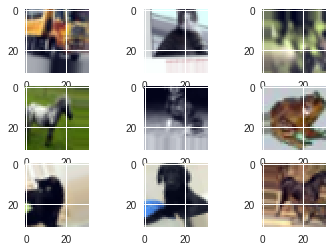

In [17]:
from matplotlib import pyplot as plt
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(toimage(X_batch[i].reshape(32, 32, 3)))
    plt.show()
    break

In [18]:
batch_size = 32
epochs = 5
model3.fit_generator(datagen.flow(X_train,y_train,batch_size = 4),steps_per_epoch = X_train.shape[0]//batch_size,epochs = epochs,verbose = 1, validation_data=(X_train_val,y_train_val))


Epoch 1/2
1250/1250 [==============================] - 25s 20ms/step - loss: 14.4718 - acc: 0.1006 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 2/2
1250/1250 [==============================] - 25s 20ms/step - loss: 14.5417 - acc: 0.0978 - val_loss: 14.5015 - val_acc: 0.1003


In [19]:
batch_size = 32
epochs = 5
model4.fit_generator(datagen.flow(X_train,y_train,batch_size = 4),steps_per_epoch = X_train.shape[0]//batch_size,epochs = epochs,verbose = 1, validation_data=(X_train_val,y_train_val))

Epoch 1/2
1250/1250 [==============================] - 26s 21ms/step - loss: 11.2695 - acc: 0.2568 - val_loss: 9.3262 - val_acc: 0.2025
Epoch 2/2
1250/1250 [==============================] - 24s 19ms/step - loss: 10.8921 - acc: 0.2754 - val_loss: 6.6782 - val_acc: 0.2196


In [20]:
batch_size = 32
epochs = 5
model3.fit_generator(datagen.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)

Epoch 1/2
1250/1250 [==============================] - 56s 45ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 2/2
1250/1250 [==============================] - 52s 41ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003


##Data Augmentation 2[2nd Place]:

In [0]:
    datagen2 = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,
        zca_epsilon=1e-06,  
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,  
        zoom_range=0.,  
        channel_shift_range=0.,  
        fill_mode='nearest',
        cval=0.,  
        horizontal_flip=True,  
        vertical_flip=False, 
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    datagen2.fit(X_train)


In [22]:
#Model 3 With improvement 
batch_size = 128
epochs = 5
model3.fit_generator(datagen2.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)

Epoch 1/10
625/625 [==============================] - 40s 64ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 2/10
625/625 [==============================] - 32s 51ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 3/10
625/625 [==============================] - 33s 52ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 4/10
625/625 [==============================] - 32s 52ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 5/10
625/625 [==============================] - 33s 53ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 6/10
625/625 [==============================] - 32s 52ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 7/10
625/625 [==============================] - 34s 54ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 8/10
625/625 [============================

In [24]:
epochs = 1

model4.fit_generator(datagen2.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)

Epoch 1/1
625/625 [==============================] - 31s 50ms/step - loss: 1.3860 - acc: 0.5342 - val_loss: 1.1765 - val_acc: 0.6176


In [25]:
model.fit_generator(datagen2.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)

Epoch 1/1
625/625 [==============================] - 30s 48ms/step - loss: 1.1085 - acc: 0.6260 - val_loss: 0.9296 - val_acc: 0.6916


In [26]:
model5.fit_generator(datagen2.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)
scores = model5.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Epoch 1/1
10000/10000 [==============================] - 1s 150us/step

Test result: 80.820 loss: 0.710


## Data Augmentation 3 [1st Place] {Winner}:

In [0]:
datagen3 = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen3.fit(X_train)

In [28]:
batch_size = 64
epochs = 5
model3.fit_generator(datagen3.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)
scores = model3.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Epoch 1/5
625/625 [==============================] - 35s 55ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 2/5
625/625 [==============================] - 34s 54ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 3/5
625/625 [==============================] - 33s 53ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 4/5
625/625 [==============================] - 32s 52ms/step - loss: 14.5075 - acc: 0.0999 - val_loss: 14.5015 - val_acc: 0.1003
Epoch 5/5
10000/10000 [==============================] - 1s 92us/step

Test result: 10.000 loss: 14.506


There is underfitting happening in here, Therefore It is the winner model for solving the Cifar10 Problem

In [29]:
batch_size = 64
epochs = 10
model5.fit_generator(datagen3.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)
scores = model5.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Epoch 1/10
625/625 [==============================] - 38s 61ms/step - loss: 0.8178 - acc: 0.7622 - val_loss: 0.7144 - val_acc: 0.8072
Epoch 2/10
625/625 [==============================] - 35s 56ms/step - loss: 0.7878 - acc: 0.7747 - val_loss: 0.6763 - val_acc: 0.8196
Epoch 3/10
625/625 [==============================] - 34s 55ms/step - loss: 0.7669 - acc: 0.7835 - val_loss: 0.8047 - val_acc: 0.7791
Epoch 4/10
625/625 [==============================] - 35s 56ms/step - loss: 0.7622 - acc: 0.7852 - val_loss: 0.7943 - val_acc: 0.7912
Epoch 5/10
625/625 [==============================] - 37s 59ms/step - loss: 0.7462 - acc: 0.7899 - val_loss: 0.8280 - val_acc: 0.7794
Epoch 6/10
625/625 [==============================] - 35s 55ms/step - loss: 0.7356 - acc: 0.7948 - val_loss: 0.7383 - val_acc: 0.8024
Epoch 7/10
625/625 [==============================] - 34s 55ms/step - loss: 0.7260 - acc: 0.7992 - val_loss: 0.7113 - val_acc: 0.8120
Epoch 8/10
625/625 [==============================] - 35s 56ms